## Analyzing Amazon Co-Purchase Network of Disney Films

In [2]:
# This code is needed for using the project modules in the notebook
project_path = 'D:/Personal_Projects/Public/ODIN'  # This path should point to the current project folder
experiments_folder = project_path + '/Experiments/disney_amazon_glance/'

import os
import sys
sys.path.insert(0, os.path.abspath(project_path))


In [3]:
from odin_core import ODIN_network_manager as NetManager
from odin_core import ODIN_graph_clustering as Gclust
from odin_core import ODIN_anomaly_detection as AnDet
from odin_core import ODIN_visualization as Vis


###Reading the network from graphml file

In [4]:
data_folder = project_path + '/Networks/disney_amazon/'

disney_network = NetManager.read_network_from_graphml(data_folder + 'Disney.graphml')


###Detecting communities in the network

In [5]:
communities, partition = Gclust.louvain_community_detection(disney_network)

NetManager.write_dictionary_as_pickle_file(communities, experiments_folder + 'disney_communities.pickle')
NetManager.write_dictionary_as_pickle_file(partition, experiments_folder + 'disney_partition.pickle')


###Detecting Outliers

In [6]:
communities = NetManager.read_dictionary_from_pickle_file(experiments_folder + 'disney_communities.pickle')
partition = NetManager.read_dictionary_from_pickle_file(experiments_folder + 'disney_partition.pickle')

glance_ranking = AnDet.glance(disney_network,
                              communities,
                              att_to_analyze=['MinPriceUsedItem', 'MinPricePrivateSeller', 'Avg_Helpful', 'Avg_Rating'])

NetManager.write_dictionary_as_pickle_file(glance_ranking, experiments_folder + 'glance_ranking.pickle')


### Analyzing the results

#### Drawing the network

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


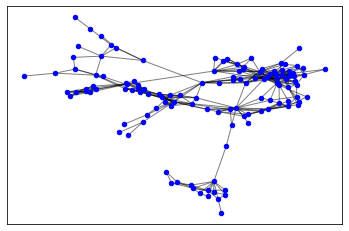

In [7]:
Vis.draw_graph(disney_network)


#### Coloring the nodes by their community

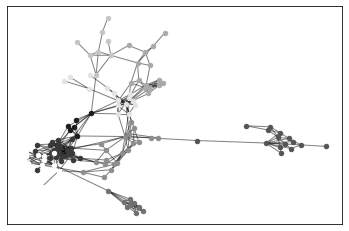

In [8]:
partition = NetManager.read_dictionary_from_pickle_file(experiments_folder + 'disney_partition.pickle')
Vis.draw_graph_communities(disney_network, partition)

#### Coloring the nodes by their anomaly score

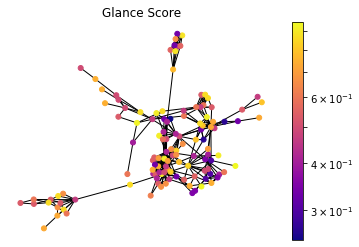

In [9]:
glance_ranking = NetManager.read_dictionary_from_pickle_file(experiments_folder + 'glance_ranking.pickle')
Vis.draw_heat(disney_network, glance_ranking, 'Glance Score')
